In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression

In [185]:
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-01 20:57:38 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81078,0.15299,0.03623,4.94800,...,0.99532,0.00468,0.00000,0.00000,1.00000,0.82126,0.64514,0.44535,0.28578,2022-12-01 20:58:35 UTC
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.00000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC
2,2022-12-01 20:57:38 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82648,0.51415,0.23400,0.12332,2022-12-01 20:58:35 UTC
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC
4,2022-12-01 20:57:38 UTC,England,B,86.96946,2.62701,0.44455,2.00000,1.00000,0.00000,7.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.67840,0.36282,0.18665,0.08832,2022-12-01 20:58:35 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-12-01 20:58:35 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-01 20:58:35 UTC
125,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-12-01 20:58:35 UTC
126,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-12-01 20:58:35 UTC


In [186]:
dfteam = df.sort_values("team")
dfteam1 = dfteam.drop_duplicates(subset="team", keep = "first")
dfteam1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23508,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-01 20:58:35 UTC
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.00000,1.00000,1.00000,-1.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.99515,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.00000,0.01713,0.31981,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC
62,2022-11-28 20:59:50 UTC,Canada,F,71.52045,1.97761,0.77110,0.29019,0.31463,2.39518,-4.20617,...,0.00000,0.00000,0.06808,0.93192,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.01311,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-01 20:58:35 UTC
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.27547,0.26872,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC
28,2022-12-01 20:57:38 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.19014,0.29195,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-01 20:58:35 UTC


In [187]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored"]], dfteam1["win_league"])
dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3560026941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-01 20:58:35 UTC,-0.010611
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.00000,1.00000,1.00000,-1.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,0.020922
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.01713,0.31981,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC,-0.019355
62,2022-11-28 20:59:50 UTC,Canada,F,71.52045,1.97761,0.77110,0.29019,0.31463,2.39518,-4.20617,...,0.00000,0.06808,0.93192,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.010525
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-01 20:58:35 UTC,-0.007014
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986
28,2022-12-01 20:57:38 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.022410
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.29195,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-01 20:58:35 UTC,0.033159


In [188]:
dfcandidate = dfteam1.sort_values("predict_results", ascending = False)
dfcandidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.35459,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986


In [189]:
dfA16 = dfcandidate[df.group == "A"].head(n = 2)
dfA16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1248350719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA16 = dfcandidate[df.group == "A"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
111,2022-11-16 16:00:55 UTC,Senegal,A,73.84140,1.94597,0.64928,1.10327,0.84656,1.05017,0.13989,...,0.30172,0.29356,0.19515,0.51129,0.23152,0.09563,0.03294,0.01199,2022-12-01 20:58:35 UTC,0.036365


In [190]:
dfB16 = dfcandidate[df.group == "B"].head(n = 2)
dfB16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\2245931670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB16 = dfcandidate[df.group == "B"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192
109,2022-11-16 16:00:55 UTC,USA,B,74.83489,2.11382,0.72330,1.08538,0.87897,1.03565,0.07698,...,0.30813,0.26353,0.20694,0.52953,0.24297,0.10082,0.03517,0.01304,2022-12-01 20:58:35 UTC,0.035057


In [191]:
dfC16 = dfcandidate[df.group == "C"].head(n = 2)
dfC16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\2619915074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC16 = dfcandidate[df.group == "C"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-01 20:58:35 UTC,0.035578


In [192]:
dfD16 = dfcandidate[df.group == "D"].head(n = 2)
dfD16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3568035520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD16 = dfcandidate[df.group == "D"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-01 20:58:35 UTC,0.004094


In [193]:
dfE16 = dfcandidate[df.group == "E"].head(n = 2)
dfE16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3174875314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE16 = dfcandidate[df.group == "E"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.0000,1.00000,6.00000,...,1.00000,0.0000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [194]:
dfF16 = dfcandidate[df.group == "F"].head(n = 2)
dfF16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\2577019320.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfF16 = dfcandidate[df.group == "F"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.2432,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.00000,1.00000,1.00000,-1.00000,...,0.00000,1.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,0.020922


In [195]:
dfG16 = dfcandidate[df.group == "G"].head(n = 2)
dfG16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1284428377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfG16 = dfcandidate[df.group == "G"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927


In [196]:
dfH16 = dfcandidate[df.group == "H"].head(n = 2)
dfH16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3074301813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfH16 = dfcandidate[df.group == "H"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.35459,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215


In [197]:
dfAwinners = dfA16.sort_values("predict_results", ascending = False).head(n = 1)
dfAwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896


In [198]:
dfARunners_up = dfA16.sort_values("predict_results").head(n = 1)
dfARunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
111,2022-11-16 16:00:55 UTC,Senegal,A,73.8414,1.94597,0.64928,1.10327,0.84656,1.05017,0.13989,...,0.30172,0.29356,0.19515,0.51129,0.23152,0.09563,0.03294,0.01199,2022-12-01 20:58:35 UTC,0.036365


In [199]:
dfBwinners = dfB16.sort_values("predict_results", ascending = False).head(n = 1)
dfBwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192


In [200]:
dfBRunners_up = dfB16.sort_values("predict_results").head(n = 1)
dfBRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
109,2022-11-16 16:00:55 UTC,USA,B,74.83489,2.11382,0.7233,1.08538,0.87897,1.03565,0.07698,...,0.30813,0.26353,0.20694,0.52953,0.24297,0.10082,0.03517,0.01304,2022-12-01 20:58:35 UTC,0.035057


In [201]:
dfCwinners = dfC16.sort_values("predict_results", ascending = False).head(n = 1)
dfCwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.466,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.2307,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027


In [202]:
dfCRunners_up = dfC16.sort_values("predict_results").head(n = 1)
dfCRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-01 20:58:35 UTC,0.035578


In [203]:
dfDwinners = dfD16.sort_values("predict_results", ascending = False).head(n = 1)
dfDwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.8376,0.46033,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


In [204]:
dfDRunners_up = dfD16.sort_values("predict_results").head(n = 1)
dfDRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-01 20:58:35 UTC,0.004094


In [205]:
dfEwinners = dfE16.sort_values("predict_results", ascending = False).head(n = 1)
dfEwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907


In [206]:
dfERunners_up = dfE16.sort_values("predict_results").head(n = 1)
dfERunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [207]:
dfFwinners = dfF16.sort_values("predict_results", ascending = False).head(n = 1)
dfFwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.2432,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986


In [208]:
dfFRunners_up = dfF16.sort_values("predict_results").head(n = 1)
dfFRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
24,2022-12-01 20:57:38 UTC,Belgium,F,80.919,2.439,0.65161,1.0,1.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01 20:58:35 UTC,0.020922


In [209]:
dfGwinners = dfG16.sort_values("predict_results", ascending = False).head(n = 1)
dfGwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


In [210]:
dfGRunners_up = dfG16.sort_values("predict_results").head(n = 1)
dfGRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927


In [211]:
dfHwinners = dfH16.sort_values("predict_results", ascending = False).head(n = 1)
dfHwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886


In [212]:
dfHRunners_up = dfH16.sort_values("predict_results").head(n = 1)
dfHRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.35459,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215


In [213]:
frame1 = [dfAwinners, dfBRunners_up]
RoundOf16Game1_December3 = pd.concat(frame1)
RoundOf16Game1_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
109,2022-11-16 16:00:55 UTC,USA,B,74.83489,2.11382,0.72330,1.08538,0.87897,1.03565,0.07698,...,0.30813,0.26353,0.20694,0.52953,0.24297,0.10082,0.03517,0.01304,2022-12-01 20:58:35 UTC,0.035057


<AxesSubplot: xlabel='team'>

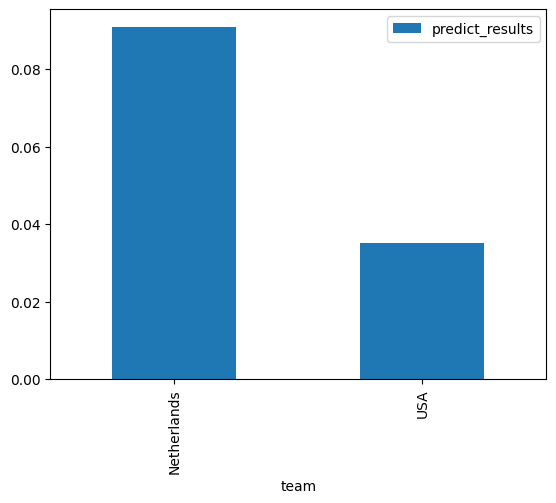

In [214]:
RoundOf16Game1_December3.reset_index().plot.bar(x="team", y="predict_results")

In [215]:
WinnersOfMatch49 = RoundOf16Game1_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch49

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896


In [216]:
frame2 = [dfCwinners, dfDRunners_up]
RoundOf16Game2_December3 = pd.concat(frame2)
RoundOf16Game2_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-01 20:58:35 UTC,0.004094


<AxesSubplot: xlabel='team'>

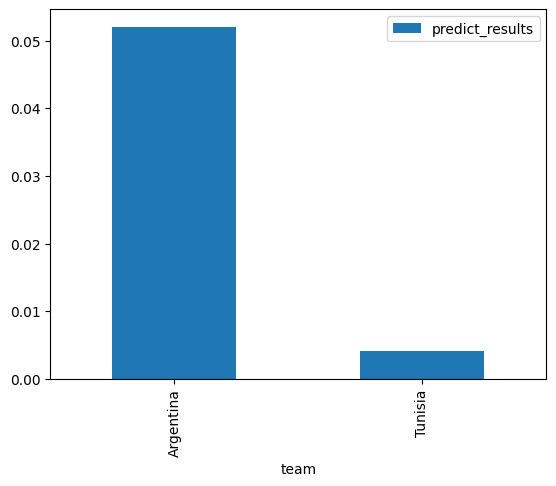

In [217]:
RoundOf16Game2_December3.reset_index().plot.bar(x="team", y="predict_results")

In [218]:
WinnersOfMatch50 = RoundOf16Game2_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch50

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.466,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.2307,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027


In [219]:
frame3 = [dfEwinners, dfFRunners_up]
RoundOf16Game1_December5 = pd.concat(frame3)
RoundOf16Game1_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,0.020922


<AxesSubplot: xlabel='team'>

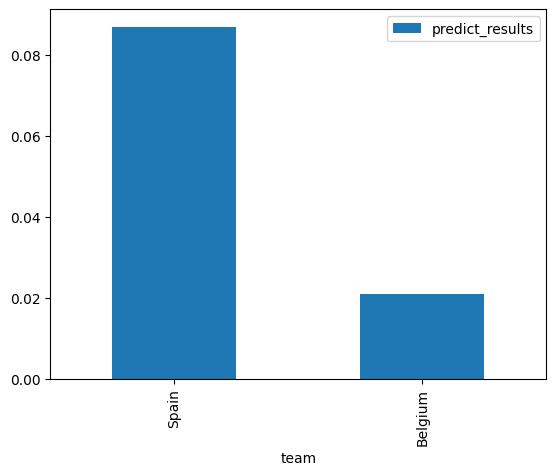

In [220]:
RoundOf16Game1_December5.reset_index().plot.bar(x="team", y="predict_results")

In [221]:
WinnersOfMatch53 = RoundOf16Game1_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch53

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907


In [222]:
frame4 = [dfGwinners, dfHRunners_up]
RoundOf16Game2_December5 = pd.concat(frame4)
RoundOf16Game2_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.35459,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215


<AxesSubplot: xlabel='team'>

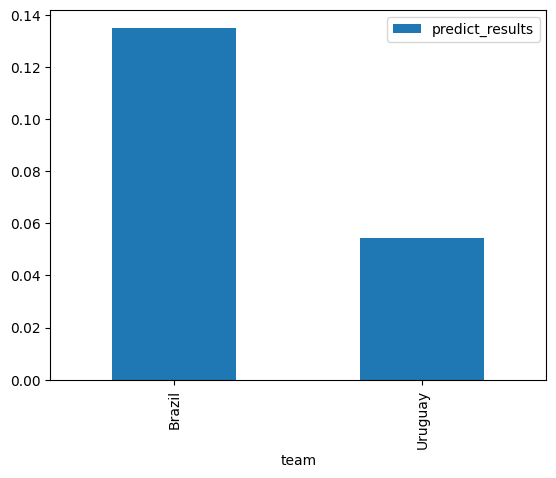

In [223]:
RoundOf16Game2_December5.reset_index().plot.bar(x="team", y="predict_results")

In [224]:
WinnersOfMatch54 = RoundOf16Game2_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch54


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


In [225]:
frame5 = [dfBwinners, dfARunners_up]
RoundOf16Game1_December4 = pd.concat(frame5)
RoundOf16Game1_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192
111,2022-11-16 16:00:55 UTC,Senegal,A,73.84140,1.94597,0.64928,1.10327,0.84656,1.05017,0.13989,...,0.30172,0.29356,0.19515,0.51129,0.23152,0.09563,0.03294,0.01199,2022-12-01 20:58:35 UTC,0.036365


<AxesSubplot: xlabel='team'>

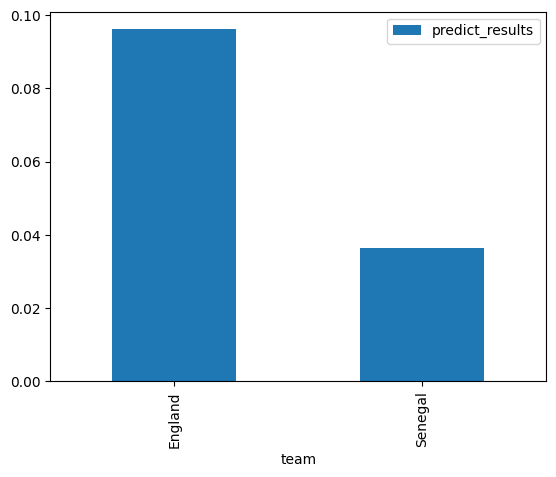

In [226]:
RoundOf16Game1_December4.reset_index().plot.bar(x="team", y="predict_results")

In [227]:
WinnersOfMatch51 = RoundOf16Game1_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch51

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192


In [228]:
frame6 = [dfDwinners, dfCRunners_up]
RoundOf16Game2_December4 = pd.concat(frame6)
RoundOf16Game2_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-01 20:58:35 UTC,0.035578


<AxesSubplot: xlabel='team'>

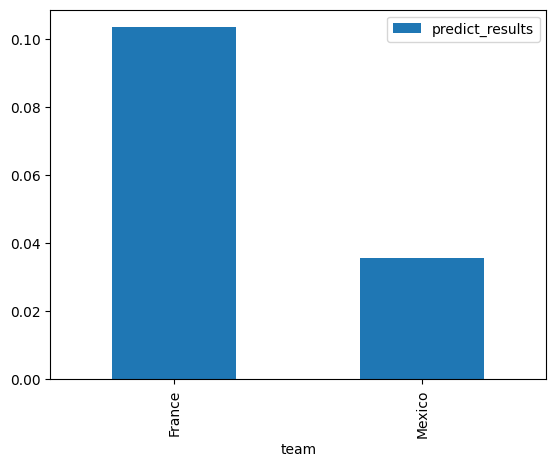

In [229]:
RoundOf16Game2_December4.reset_index().plot.bar(x="team", y="predict_results")


In [230]:
WinnersOfMatch52 = RoundOf16Game2_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch52

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.8376,0.46033,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


In [231]:
frame7 = [dfFwinners, dfERunners_up]
RoundOf16Game1_December6 = pd.concat(frame7)
RoundOf16Game1_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.2432,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


<AxesSubplot: xlabel='team'>

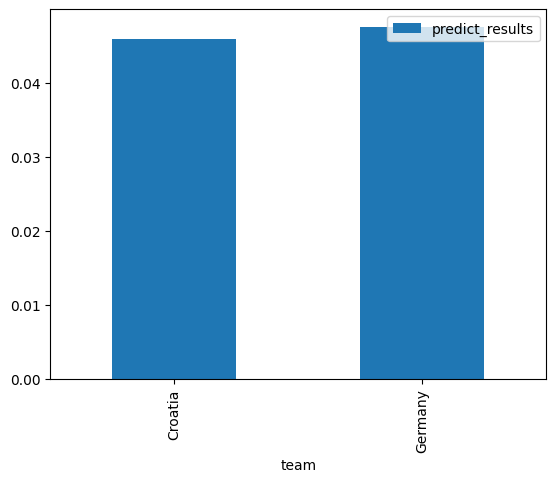

In [232]:
RoundOf16Game1_December6.reset_index().plot.bar(x="team", y="predict_results")

In [233]:
WinnersOfMatch55 = RoundOf16Game1_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch55

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [234]:
frame8 = [dfHwinners, dfGRunners_up]
RoundOf16Game2_December6 = pd.concat(frame8)
RoundOf16Game2_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927


<AxesSubplot: xlabel='team'>

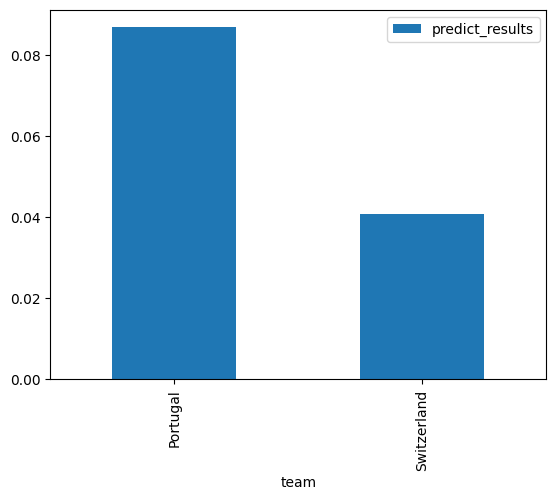

In [235]:
RoundOf16Game2_December6.reset_index().plot.bar(x="team", y="predict_results")

In [236]:
WinnersOfMatch56 = RoundOf16Game2_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch56

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886


In [237]:
frame9 = [WinnersOfMatch49, WinnersOfMatch50]
QuaterFinalsGame1_December9 = pd.concat(frame9)
QuaterFinalsGame1_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.0000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.2307,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027


<AxesSubplot: xlabel='team'>

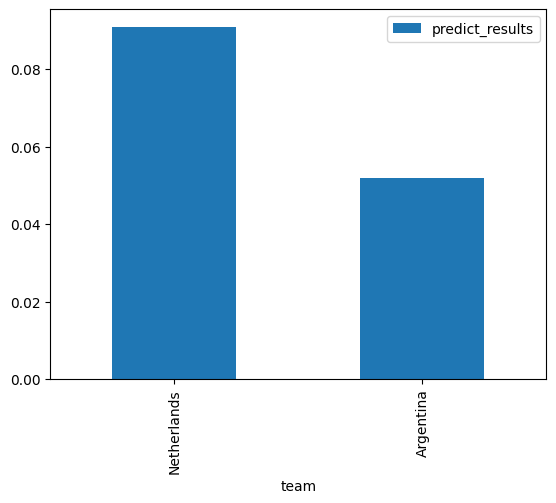

In [238]:
QuaterFinalsGame1_December9.reset_index().plot.bar(x="team", y="predict_results")

In [239]:
WinnersOfMatch57 = QuaterFinalsGame1_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch57

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896


In [240]:
frame10 = [WinnersOfMatch53, WinnersOfMatch54]
QuaterFinalsGame2_December9 = pd.concat(frame10)
QuaterFinalsGame2_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


<AxesSubplot: xlabel='team'>

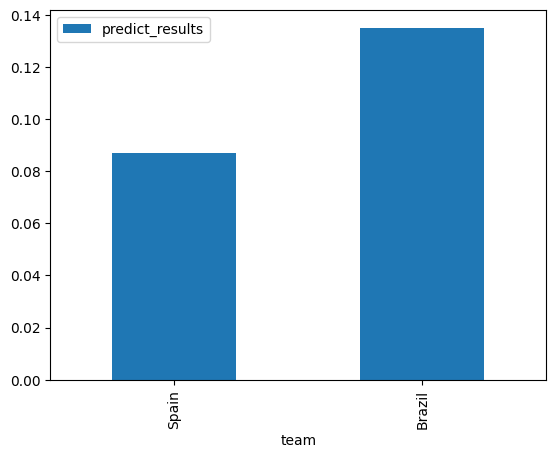

In [241]:
QuaterFinalsGame2_December9.reset_index().plot.bar(x="team", y="predict_results")

In [242]:
WinnersOfMatch58 = QuaterFinalsGame2_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch58

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


In [243]:
frame11 = [WinnersOfMatch51, WinnersOfMatch52]
QuaterFinalsGame1_December10 = pd.concat(frame11)
QuaterFinalsGame1_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.0000,...,0.0000,0.00000,0.0,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


<AxesSubplot: xlabel='team'>

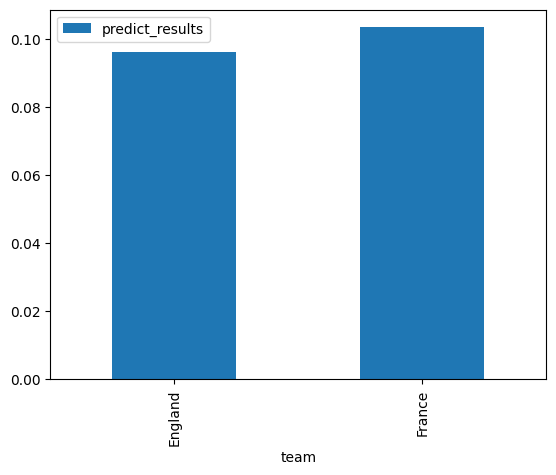

In [244]:
QuaterFinalsGame1_December10.reset_index().plot.bar(x="team", y="predict_results")


In [245]:
WinnersOfMatch59 = QuaterFinalsGame1_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch59

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.8376,0.46033,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


In [246]:
frame12 = [WinnersOfMatch55, WinnersOfMatch56]
QuaterFinalsGame2_December10 = pd.concat(frame12)
QuaterFinalsGame2_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886


<AxesSubplot: xlabel='team'>

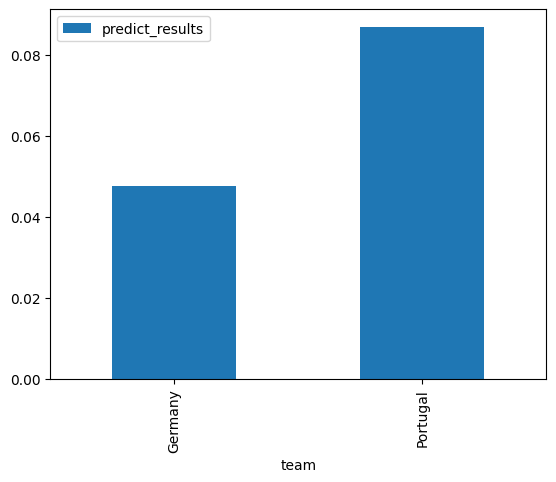

In [247]:
QuaterFinalsGame2_December10.reset_index().plot.bar(x="team", y="predict_results")

In [248]:
WinnersOfMatch60 = QuaterFinalsGame2_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch60

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886


In [249]:
frame13 = [WinnersOfMatch57, WinnersOfMatch58]
SemiFinalsGame1_December13 = pd.concat(frame13)
SemiFinalsGame1_December13

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.0,0.0,1.0,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


<AxesSubplot: xlabel='team'>

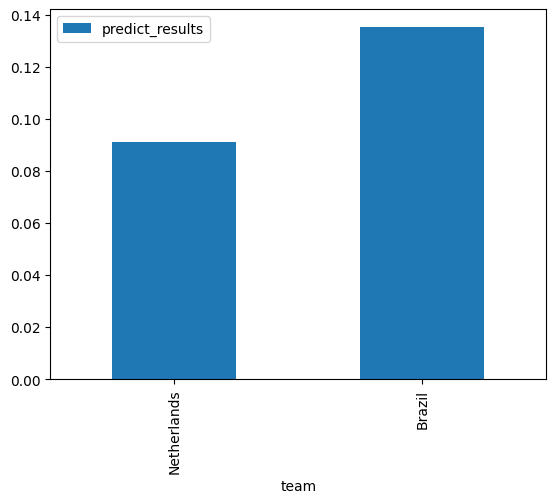

In [250]:
SemiFinalsGame1_December13.reset_index().plot.bar(x="team", y="predict_results")

In [251]:
WinnersOfMatch61 = SemiFinalsGame1_December13.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch61

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


In [252]:
frame14 = [WinnersOfMatch59, WinnersOfMatch60]
SemiFinalsGame1_December14 = pd.concat(frame14)
SemiFinalsGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886


<AxesSubplot: xlabel='team'>

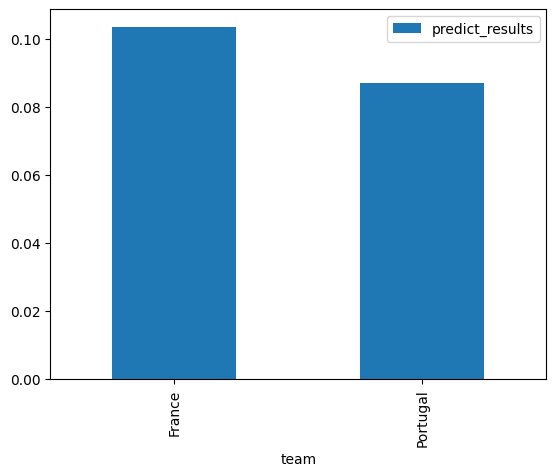

In [253]:
SemiFinalsGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [254]:
WinnersOfMatch62 = SemiFinalsGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch62

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.8376,0.46033,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


In [255]:
frame15 = [WinnersOfMatch61, WinnersOfMatch62]
FinalGame1_December14 = pd.concat(frame15)
FinalGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.8376,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.0,0.0,1.0,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398


<AxesSubplot: xlabel='team'>

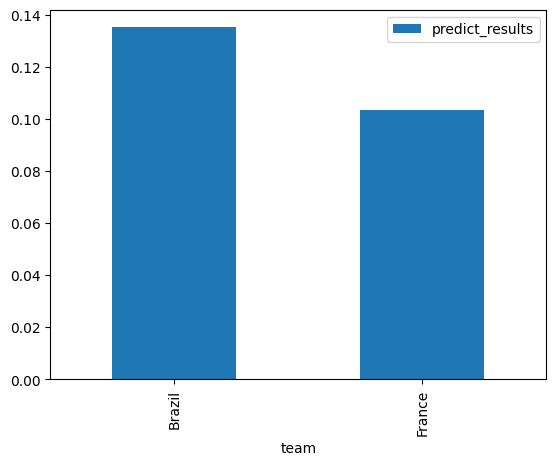

In [256]:
FinalGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [257]:
WinnersOfFIFA2022WorldCup = FinalGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfFIFA2022WorldCup

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00485,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183


In [258]:
dfgame1candidate1 = dfcandidate[dfcandidate.team == "Japan"]
dfgame1candidate1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.9156,0.76006,1.32434,-1.03341,...,0.23408,0.43682,0.21826,0.34492,0.1576,0.05775,0.02465,0.00876,2022-12-01 20:58:35 UTC,0.024042


In [259]:
dfgame1candidate2 = dfcandidate[dfcandidate.team == "Spain"]
dfgame1candidate2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907


In [260]:
frameA = [dfgame1candidate1, dfgame1candidate2]
game1 = pd.concat(frameA)
game1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.9156,0.76006,1.32434,-1.03341,...,0.23408,0.43682,0.21826,0.34492,0.15760,0.05775,0.02465,0.00876,2022-12-01 20:58:35 UTC,0.024042
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907


<AxesSubplot: xlabel='team'>

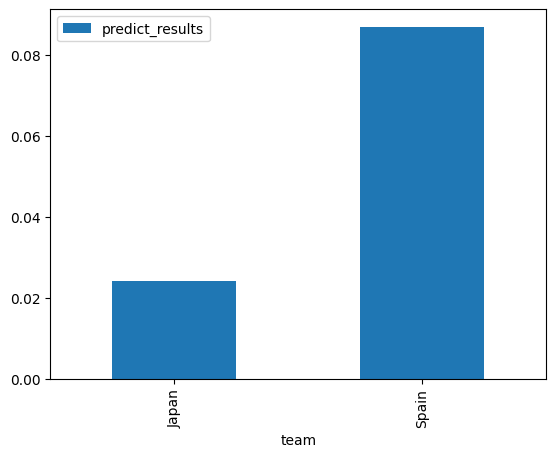

In [261]:
game1.reset_index().plot.bar(x="team", y="predict_results")

In [262]:
WinnerOfGame1 = game1.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907


In [263]:
dfgame2candidate1 = dfcandidate[dfcandidate.team == "Costa Rica"]
dfgame2candidate1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.1424,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.0002,2022-12-01 20:58:35 UTC,-0.007014


In [264]:
dfgame2candidate2 = dfcandidate[dfcandidate.team == "Germany"]
dfgame2candidate2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [265]:
frameB = [dfgame2candidate1, dfgame2candidate2]
game2 = pd.concat(frameB)
game2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.1424,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-01 20:58:35 UTC,-0.007014
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


<AxesSubplot: xlabel='team'>

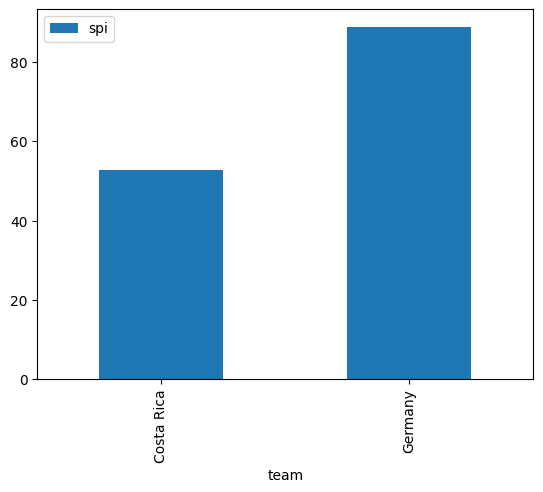

In [266]:
game2.reset_index().plot.bar(x="team", y="spi")

In [267]:
WinnerOfGame2 = game2.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [268]:
frameR16 = [dfA16, dfB16, dfC16, dfD16, dfE16, dfF16, dfG16, dfH16]
RoundOf16Candidate = pd.concat(frameR16)
RoundOf16Candidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896
111,2022-11-16 16:00:55 UTC,Senegal,A,73.84140,1.94597,0.64928,1.10327,0.84656,1.05017,0.13989,...,0.30172,0.29356,0.19515,0.51129,0.23152,0.09563,0.03294,0.01199,2022-12-01 20:58:35 UTC,0.036365
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192
109,2022-11-16 16:00:55 UTC,USA,B,74.83489,2.11382,0.72330,1.08538,0.87897,1.03565,0.07698,...,0.30813,0.26353,0.20694,0.52953,0.24297,0.10082,0.03517,0.01304,2022-12-01 20:58:35 UTC,0.035057
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-01 20:58:35 UTC,0.035578
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-01 20:58:35 UTC,0.004094
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615


In [269]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_round_of_16"])
dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3335883704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027,0.501948
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-01 20:58:35 UTC,-0.010611,0.220520
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.00000,1.00000,1.00000,-1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,0.020922,0.285994
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,1.135016
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.31981,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC,-0.019355,0.116961
62,2022-11-28 20:59:50 UTC,Canada,F,71.52045,1.97761,0.77110,0.29019,0.31463,2.39518,-4.20617,...,0.06808,0.93192,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.010525,0.014058
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-01 20:58:35 UTC,-0.007014,-0.038669
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986,0.523876
28,2022-12-01 20:57:38 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.022410,0.042792
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-01 20:58:35 UTC,0.033159,0.488102


In [274]:
dfCandidate = dfteam1.sort_values("predict_ChanceOfRoundOf16", ascending = False)
dfCandidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,1.135016
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192,1.021373
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907,1.007028
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896,0.937857
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398,0.898774
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886,0.808221
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215,0.592927
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986,0.523876
111,2022-11-16 16:00:55 UTC,Senegal,A,73.84140,1.94597,0.64928,1.10327,0.84656,1.05017,0.13989,...,0.29356,0.19515,0.51129,0.23152,0.09563,0.03294,0.01199,2022-12-01 20:58:35 UTC,0.036365,0.508710
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027,0.501948


In [275]:
dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]
dfgroupHcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\346358755.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
84,2022-11-24 20:56:17 UTC,South Korea,H,66.43505,1.66252,0.74092,0.61698,1.58058,0.80244,-0.46737,...,0.36974,0.24362,0.38664,0.10383,0.03815,0.01531,0.00483,2022-12-01 20:58:35 UTC,-0.003836,0.329968


In [276]:
dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]
dfgroupHcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3815101000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886,0.808221


In [277]:
frameH1 = [dfgroupHcandidate1, dfgroupHcandidate2]
gameH1 = pd.concat(frameH1)
gameH1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
84,2022-11-24 20:56:17 UTC,South Korea,H,66.43505,1.66252,0.74092,0.61698,1.58058,0.80244,-0.46737,...,0.36974,0.24362,0.38664,0.10383,0.03815,0.01531,0.00483,2022-12-01 20:58:35 UTC,-0.003836,0.329968
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886,0.808221


<AxesSubplot: xlabel='team'>

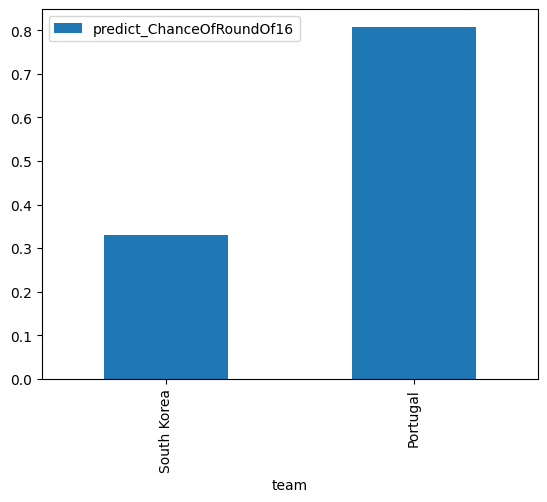

In [278]:
gameH1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [279]:
WinnerOfGameH1 = gameH1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886,0.808221


In [280]:
dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]
dfgroupHcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1798223390.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
93,2022-11-24 20:56:17 UTC,Ghana,H,60.03229,1.50523,0.8658,0.38635,0.61211,2.00154,-2.22472,...,0.21995,0.60969,0.17036,0.0252,0.00636,0.00206,0.0005,2022-12-01 20:58:35 UTC,-0.010479,0.248362


In [281]:
dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]
dfgroupHcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\2481320698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215,0.592927


In [282]:
frameH2 = [dfgroupHcandidate3, dfgroupHcandidate4]
gameH2 = pd.concat(frameH2)
gameH2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
93,2022-11-24 20:56:17 UTC,Ghana,H,60.03229,1.50523,0.86580,0.38635,0.61211,2.00154,-2.22472,...,0.21995,0.60969,0.17036,0.02520,0.00636,0.00206,0.00050,2022-12-01 20:58:35 UTC,-0.010479,0.248362
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215,0.592927


<AxesSubplot: xlabel='team'>

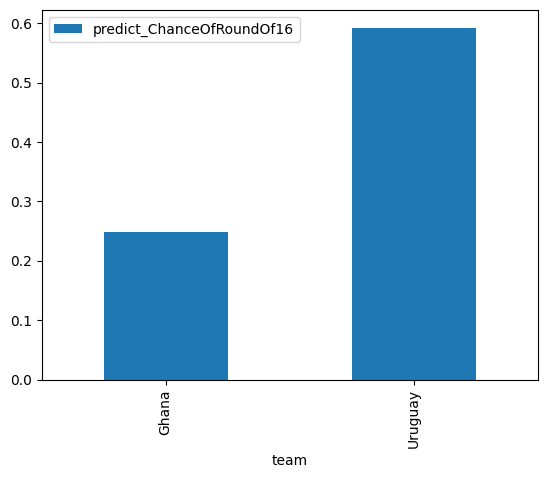

In [283]:
gameH2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [285]:
WinnerOfGameH2 = gameH2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.22909,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215,0.592927


In [286]:
dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]
dfgroupGcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1947669684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
82,2022-11-24 20:56:17 UTC,Serbia,G,74.55183,2.10043,0.72657,0.77051,0.59446,1.63503,-1.72837,...,0.39815,0.30495,0.2969,0.11168,0.04855,0.02049,0.00672,2022-12-01 20:58:35 UTC,0.015137,0.273495


In [287]:
dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]
dfgroupGcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\4265024335.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927,0.501259


In [290]:
frameG1 = [dfgroupGcandidate1, dfgroupGcandidate2]
gameG1 = pd.concat(frameG1)
gameG1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
82,2022-11-24 20:56:17 UTC,Serbia,G,74.55183,2.10043,0.72657,0.77051,0.59446,1.63503,-1.72837,...,0.39815,0.30495,0.29690,0.11168,0.04855,0.02049,0.00672,2022-12-01 20:58:35 UTC,0.015137,0.273495
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927,0.501259


<AxesSubplot: xlabel='team'>

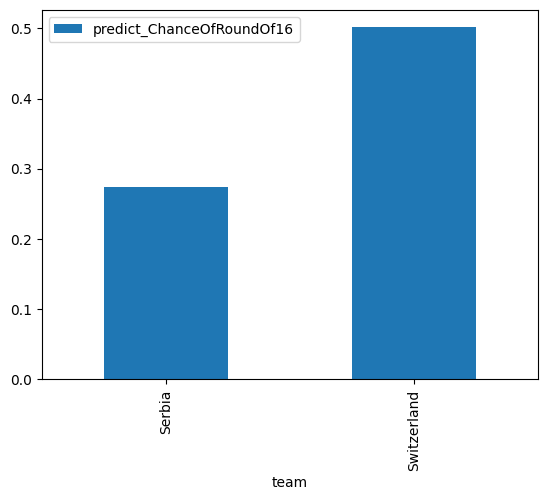

In [291]:
gameG1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [299]:
WinnerOfGameG1 = gameG1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-01 20:58:35 UTC,0.040927,0.501259


In [294]:
dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]
dfgroupGcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1978172570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.31981,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC,-0.019355,0.116961


In [295]:
dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]
dfgroupGcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\3700774475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,1.135016


In [296]:
frameG2 = [dfgroupGcandidate3, dfgroupGcandidate4]
gameG2 = pd.concat(frameG2)
gameG2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.31981,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC,-0.019355,0.116961
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,1.135016


<AxesSubplot: xlabel='team'>

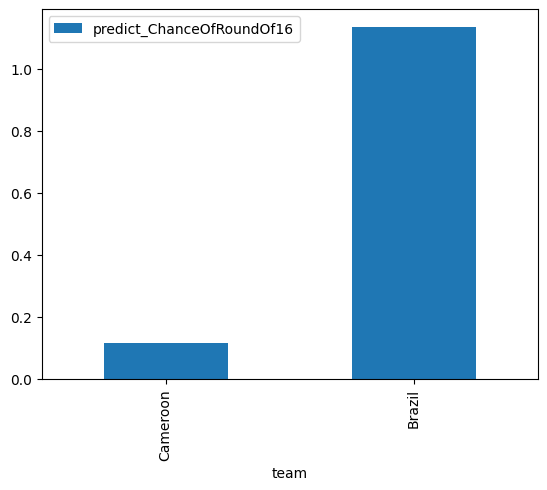

In [297]:
gameG2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [298]:
WinnerOfGameG2 = gameG2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.0621,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.0,0.0,1.0,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,1.135016


In [302]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_quarters"])
dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4452\1097749551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027,0.326802,0.326802
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-01 20:58:35 UTC,-0.010611,0.039279,0.039279
24,2022-12-01 20:57:38 UTC,Belgium,F,80.91900,2.43900,0.65161,1.00000,1.00000,1.00000,-1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,0.020922,0.117229,0.117229
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,0.728189,0.728189
61,2022-11-28 20:59:50 UTC,Cameroon,G,64.47548,1.69585,0.84762,0.03652,1.15059,1.81289,-2.94744,...,0.66306,0.01713,0.00451,0.00145,0.00038,0.00015,2022-12-01 20:58:35 UTC,-0.019355,0.016637,0.016637
62,2022-11-28 20:59:50 UTC,Canada,F,71.52045,1.97761,0.77110,0.29019,0.31463,2.39518,-4.20617,...,0.93192,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.010525,-0.018920,-0.018920
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-01 20:58:35 UTC,-0.007014,-0.062760,-0.062760
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986,0.311424,0.311424
28,2022-12-01 20:57:38 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-01 20:58:35 UTC,-0.022410,-0.051587,-0.051587
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-01 20:58:35 UTC,0.033159,0.260099,0.260099


In [303]:
dfCandidateQ = dfteam1.sort_values("predict_ChanceOfRoundOf16", ascending = False)
dfCandidateQ

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
32,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-12-01 20:58:35 UTC,0.135183,0.728189,0.728189
1,2022-12-01 20:57:38 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.72837,0.43389,0.24759,0.12453,2022-12-01 20:58:35 UTC,0.086907,0.672681,0.672681
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-01 20:58:35 UTC,0.096192,0.660462,0.660462
3,2022-12-01 20:57:38 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,0.00000,1.00000,0.81117,0.46283,0.24129,0.11499,2022-12-01 20:58:35 UTC,0.103398,0.601972,0.601972
6,2022-12-01 20:57:38 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,1.00000,0.65833,0.31401,0.12412,0.05771,2022-12-01 20:58:35 UTC,0.090896,0.558611,0.558611
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-01 20:58:35 UTC,0.086886,0.520132,0.520132
105,2022-11-16 16:00:55 UTC,Uruguay,H,80.90448,2.25529,0.53963,1.32689,0.86229,0.81082,1.06659,...,0.11817,0.65274,0.28244,0.13261,0.06615,0.02828,2022-12-01 20:58:35 UTC,0.054215,0.349541,0.349541
70,2022-11-24 20:56:17 UTC,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-01 20:58:35 UTC,0.052027,0.326802,0.326802
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-01 20:58:35 UTC,0.047615,0.326056,0.326056
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-01 20:58:35 UTC,0.045986,0.311424,0.311424


In [ ]:
dfQuarter1 = dfCandidateQ[dfCandidateQ.team == "Netherlands"]
dfQuarter1